2D angle is:  43.70445198657293
3D angle is:  43.70445198657293


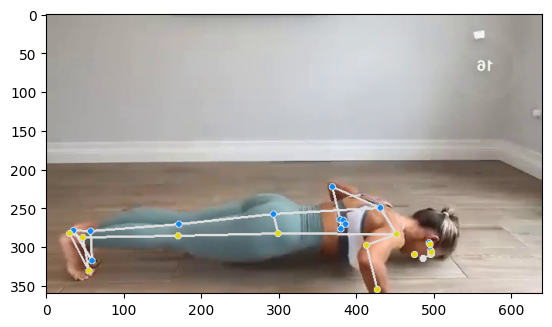

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import math

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2

def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

def calculate_angle_2D(point1, point2, point3):
    # Calculate the vectors from point2 to point1 and point2 to point3
    vector_21 = [point1[0] - point2[0], point1[1] - point2[1]]
    vector_23 = [point3[0] - point2[0], point3[1] - point2[1]]

    # Calculate the dot product of the vectors
    dot_product = vector_21[0]*vector_23[0] + vector_21[1]*vector_23[1]

    # Calculate the magnitudes of the vectors
    magnitude_21 = math.sqrt(vector_21[0]**2 + vector_21[1]**2)
    magnitude_23 = math.sqrt(vector_23[0]**2 + vector_23[1]**2)

    # Use the dot product to calculate the angle
    angle = math.acos(dot_product / (magnitude_21 * magnitude_23))

    # Convert the angle from radians to degrees
    angle = math.degrees(angle)

    return angle

def calculate_angle_3D(point1, point2, point3):
    # Calculate the vectors from point2 to point1 and point2 to point3
    vector_21 = [point1[0] - point2[0], point1[1] - point2[1], point1[2] - point2[2]]
    vector_23 = [point3[0] - point2[0], point3[1] - point2[1], point3[2] - point2[2]]

    # Calculate the dot product of the vectors
    dot_product = vector_21[0]*vector_23[0] + vector_21[1]*vector_23[1] + vector_21[2]*vector_23[2]

    # Calculate the magnitudes of the vectors
    magnitude_21 = math.sqrt(vector_21[0]**2 + vector_21[1]**2 + vector_21[2]**2)
    magnitude_23 = math.sqrt(vector_23[0]**2 + vector_23[1]**2 + vector_23[2]**2)

    # Use the dot product to calculate the angle
    angle = math.acos(dot_product / (magnitude_21 * magnitude_23))

    # Convert the angle from radians to degrees
    angle = math.degrees(angle)

    return angle

model_path = 'pose_landmarker_heavy.task'

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)

with PoseLandmarker.create_from_options(options) as landmarker:
    # Load the input image from an image file.
    image = mp.Image.create_from_file('..\images\correct_seq\cor_down_1_38.jpg')

    #..\images\correct_seq\cor_down_80_109.jpg

    # Perform pose landmarking on the provided single image.
    # The pose landmarker must be created with the image mode.
    pose_landmarker_result = landmarker.detect(image)

    pose_landmarks_list = pose_landmarker_result.pose_landmarks

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]

        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])
    
    annotated_image = draw_landmarks_on_image(image.numpy_view(), pose_landmarker_result)
    plt.imshow(annotated_image)

    #print(pose_landmarks_proto)

    #extract coordinates

    m = np.zeros((33,3))

    for i in range(33):
      pose_landmark = pose_landmarks_list[0][i]
      m[i][0] = float(pose_landmark.x)
      m[i][1] = float(pose_landmark.y)
      m[i][2] = float(pose_landmark.z)

    p1=11
    p2=13
    p3=15
  
    theta2d = calculate_angle_2D((m[p1][0],m[p1][1]), (m[p2][0],m[p2][1]), (m[p3][0],m[p3][1]))

    theta3d = calculate_angle_3D((m[p1][0],m[p1][1],m[p1][2]), (m[p2][0],m[p2][1],m[p1][2]), (m[p3][0],m[p3][1],m[p1][2]))

    print("2D angle is: ", theta2d)
    print("3D angle is: ", theta3d)
